In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

In [3]:
#scale the images
X_train, X_test = X_train/255, X_test/255

In [4]:
X_train[0].shape

(32, 32, 3)

In [5]:
np.unique(y_train,return_counts=True), np.unique(y_test,return_counts=True)

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000])),
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])))

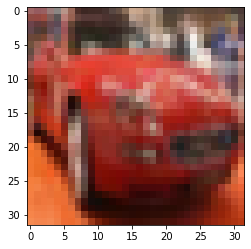

In [363]:
plt.imshow(X_train[5])

In [7]:
# - Build a DNN
# - try different varients of relu
# - also use the different weight initialization
# - use the model callback for early stopping, model checkpoint save , tensorboard and also the learning rate scheduling( try to use onecycle schudler)
# - use the different regularization like alphadropout, dropout, batch normalization and l1-l2 regulaization
# - check the accuracy getting the accuracy between (50-60 )% is a baseline
# - do the model inference and plot the graph

# Models, activitations functions and initializers

## Relu

In [8]:
tf.random.set_seed(42)
np.random.seed(42)

#start by using ONLY a few layers
relu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(256,activation="relu",kernel_initializer="he_normal"),
    keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"),
    keras.layers.Dense(10,activation="softmax",kernel_initializer= keras.initializers.glorot_normal)
])

#using the default optimizer, 
relu.compile(loss=keras.losses.sparse_categorical_crossentropy,
                           metrics="accuracy")

In [9]:
relu_history=relu.fit(X_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9937 - accuracy: 0.2927 - val_loss: 1.7976 - val_accuracy: 0.3506
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7398 - accuracy: 0.3789 - val_loss: 1.7022 - val_accuracy: 0.3952
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6728 - accuracy: 0.4036 - val_loss: 1.6417 - val_accuracy: 0.4186
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6271 - accuracy: 0.4210 - val_loss: 1.6400 - val_accuracy: 0.4186
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5901 - accuracy: 0.4336 - val_loss: 1.6045 - val_accuracy: 0.4318
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5701 - accuracy: 0.4424 - val_loss: 1.5975 - val_accuracy: 0.4365
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5540 - accuracy: 0.4500 - val_loss: 1.6503 - val_accuracy

In [71]:
results=dict()
results["relu"] = pd.DataFrame(relu_history.history).iloc[-1,:].values.tolist()

## LeakyRelu

In [11]:
tf.random.set_seed(42)
np.random.seed(42)

#start by using ONLY a few layers
leaky = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(256,activation=keras.layers.LeakyReLU(),kernel_initializer="he_normal"),
    keras.layers.Dense(128,activation=keras.layers.LeakyReLU(),kernel_initializer="he_normal"),
    keras.layers.Dense(10,activation="softmax",kernel_initializer= keras.initializers.glorot_normal)
])

#using the default optimizer, 
leaky.compile(loss=keras.losses.sparse_categorical_crossentropy,
                           metrics="accuracy")

In [12]:
history_leaky = leaky.fit(X_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2857 - accuracy: 0.2498 - val_loss: 1.8790 - val_accuracy: 0.3168
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8949 - accuracy: 0.3320 - val_loss: 1.7325 - val_accuracy: 0.3830
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7743 - accuracy: 0.3732 - val_loss: 1.7459 - val_accuracy: 0.3814
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6912 - accuracy: 0.4020 - val_loss: 1.7980 - val_accuracy: 0.3783
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6330 - accuracy: 0.4201 - val_loss: 1.6317 - val_accuracy: 0.4223
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5904 - accuracy: 0.4334 - val_loss: 1.5841 - val_accuracy: 0.4382
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5540 - accuracy: 0.4488 - val_loss: 1.6532 - val_accuracy:

In [72]:
results["leaky"]= pd.DataFrame(history_leaky.history).iloc[-1,:].values.tolist()

## Prelu

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

#start by using ONLY a few layers
prelu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(256,activation=keras.layers.PReLU(),kernel_initializer="he_normal"),
    keras.layers.Dense(128,activation=keras.layers.PReLU(),kernel_initializer="he_normal"),
    keras.layers.Dense(10,activation="softmax",kernel_initializer= keras.initializers.glorot_normal)
])

#using the default optimizer, 
prelu.compile(loss=keras.losses.sparse_categorical_crossentropy,
                           metrics="accuracy")

In [15]:
prelu_history = prelu.fit(X_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1250/1250 [==============================] - 6s 5ms/step - loss: 2.1162 - accuracy: 0.2609 - val_loss: 1.8493 - val_accuracy: 0.3360
Epoch 2/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.8233 - accuracy: 0.3459 - val_loss: 1.8052 - val_accuracy: 0.3564
Epoch 3/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.7278 - accuracy: 0.3812 - val_loss: 1.7854 - val_accuracy: 0.3722
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6622 - accuracy: 0.4083 - val_loss: 1.8009 - val_accuracy: 0.3750
Epoch 5/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.6202 - accuracy: 0.4221 - val_loss: 1.6551 - val_accuracy: 0.4145
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5815 - accuracy: 0.4376 - val_loss: 1.6058 - val_accuracy: 0.4292
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5500 - accuracy: 0.4533 - val_loss: 1.6471 - val_accuracy:

In [73]:
results["prelu"]= pd.DataFrame(prelu_history.history).iloc[-1,:].values.tolist()

## Elu

In [17]:
tf.random.set_seed(42)
np.random.seed(42)

#start by using ONLY a few layers
elu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(256,activation=keras.layers.ELU(),kernel_initializer="he_normal"),
    keras.layers.Dense(128,activation=keras.layers.ELU(),kernel_initializer="he_normal"),
    keras.layers.Dense(10,activation="softmax",kernel_initializer= keras.initializers.glorot_normal)
])

#using the default optimizer, 
elu.compile(loss=keras.losses.sparse_categorical_crossentropy,
                           metrics="accuracy")

In [18]:
elu_history = elu.fit(X_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1250/1250 [==============================] - 6s 5ms/step - loss: 2.0902 - accuracy: 0.2745 - val_loss: 1.8762 - val_accuracy: 0.3330
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7719 - accuracy: 0.3682 - val_loss: 1.6608 - val_accuracy: 0.4056
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6812 - accuracy: 0.3999 - val_loss: 1.6433 - val_accuracy: 0.4183
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6221 - accuracy: 0.4216 - val_loss: 1.7847 - val_accuracy: 0.3770
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5738 - accuracy: 0.4388 - val_loss: 1.5606 - val_accuracy: 0.4472
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5365 - accuracy: 0.4547 - val_loss: 1.5425 - val_accuracy: 0.4584
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5035 - accuracy: 0.4649 - val_loss: 1.7861 - val_accuracy:

In [74]:
results["elu"] =pd.DataFrame(elu_history.history).iloc[-1,:].values.tolist()

## Selu

In [20]:
#normalize to have the data center around 0 and std = 1
X_train_new=(X_train-X_train.mean(axis=0))/(X_train.std(axis=0))
X_test_new=(X_test-X_test.mean(axis=0))/(X_test.std(axis=0))

In [21]:
tf.random.set_seed(42)
np.random.seed(42)

#start by using ONLY a few layers
selu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(256,activation=keras.activations.selu,kernel_initializer= keras.initializers.lecun_normal),
    keras.layers.Dense(128,activation=keras.activations.selu,kernel_initializer=keras.initializers.lecun_normal),
    keras.layers.Dense(10,activation="softmax",kernel_initializer= keras.initializers.glorot_normal)
])

#using the default optimizer, 
selu.compile(loss=keras.losses.sparse_categorical_crossentropy,
                           metrics="accuracy")

In [22]:
selu_history=selu.fit(X_train_new,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1350 - accuracy: 0.3519 - val_loss: 1.6797 - val_accuracy: 0.4138
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5758 - accuracy: 0.4463 - val_loss: 1.5680 - val_accuracy: 0.4537
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4419 - accuracy: 0.4893 - val_loss: 1.5377 - val_accuracy: 0.4699
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3559 - accuracy: 0.5220 - val_loss: 1.5033 - val_accuracy: 0.4849
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2830 - accuracy: 0.5486 - val_loss: 1.5637 - val_accuracy: 0.4827
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2248 - accuracy: 0.5704 - val_loss: 1.5436 - val_accuracy: 0.4919
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1690 - accuracy: 0.5891 - val_loss: 1.5393 - val_accuracy:

In [75]:
results["selu"] = pd.DataFrame(selu_history.history).iloc[-1,:].values.tolist()

In [76]:
d = pd.DataFrame(results)
d["metric"] = ["train_loss","train_acc","valid_loss","valid_acc"]
d.reset_index(inplace=True)
d.set_index("metric",inplace=True)
d.T.drop("index",inplace=True)

In [78]:
d.drop("index",axis=1,inplace=True)

In [79]:
d

,relu,leaky,prelu,elu,selu
metric,,,,,
train_loss,1.520985,1.468773,1.479191,1.425374,1.021104
train_acc,0.461600,0.478475,0.477300,0.496500,0.644200
valid_loss,1.603485,1.472295,1.576962,1.497446,1.737838
valid_acc,0.450100,0.488600,0.454300,0.482900,0.493800


With only 3 layers and no tunning, the above summary shows that the train_acc increase from relu, leaky, prelu, elu to selu. Selu is the activation functions that give us the best accuracy on the training set for far. It is the one has the accuracy higher than the baseline: 64%. However, it is a bit overfitting. Selu will be selected to add more layers and do hyperparameter tunning.

# Hyperparameter tunning

Because the model with only 2 hidden layers give us only scores equal to the baseline score. Thus, we do hyperparamter tunning together with callback to select the best hyperparameter and enable early stopping.

## Early stopping

In [128]:
def model(n_hidden=None, n_neurons=None, lr=1e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[32,32,3]))
    for layer in range(1,n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="selu",kernel_initializer="lecun_normal"))
    model.add(keras.layers.Dense(10,activation="softmax",kernel_initializer= keras.initializers.glorot_normal))
    model.compile(optimizer=keras.optimizers.SGD(lr=lr),
                  loss=keras.losses.sparse_categorical_crossentropy,
                  metrics="accuracy")
    return model

In [129]:
wrapper = keras.wrappers.scikit_learn.KerasClassifier(model)

In [130]:
#define early_stopping to stop the model
early_stopping_cb=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [131]:
from sklearn.model_selection import GridSearchCV

params={"n_hidden":[4,5,6,7],
       "n_neurons":[128,256]}

model_cv = GridSearchCV(wrapper,params,cv=2)
model_cv.fit(X_train_new,y_train,validation_split=0.2,epochs=50,callbacks=[early_stopping_cb])

Epoch 1/50
625/625 [==============================] - 1s 2ms/step - loss: 2.0089 - accuracy: 0.2983 - val_loss: 1.8442 - val_accuracy: 0.3602
Epoch 2/50
625/625 [==============================] - 1s 2ms/step - loss: 1.7575 - accuracy: 0.3799 - val_loss: 1.7814 - val_accuracy: 0.3804
Epoch 3/50
625/625 [==============================] - 1s 2ms/step - loss: 1.6663 - accuracy: 0.4138 - val_loss: 1.7279 - val_accuracy: 0.3994
Epoch 4/50
625/625 [==============================] - 1s 2ms/step - loss: 1.6072 - accuracy: 0.4396 - val_loss: 1.6881 - val_accuracy: 0.4098
Epoch 5/50
625/625 [==============================] - 1s 2ms/step - loss: 1.5621 - accuracy: 0.4554 - val_loss: 1.6650 - val_accuracy: 0.4162
Epoch 6/50
625/625 [==============================] - 1s 2ms/step - loss: 1.5235 - accuracy: 0.4721 - val_loss: 1.6463 - val_accuracy: 0.4200
Epoch 7/50
625/625 [==============================] - 1s 2ms/step - loss: 1.4914 - accuracy: 0.4837 - val_loss: 1.6270 - val_accuracy: 0.4274
Epoch 

625/625 [==============================] - 2s 2ms/step - loss: 1.4716 - accuracy: 0.4954 - val_loss: 1.6255 - val_accuracy: 0.4300
Epoch 7/50
625/625 [==============================] - 2s 3ms/step - loss: 1.4358 - accuracy: 0.5088 - val_loss: 1.6031 - val_accuracy: 0.4402
Epoch 8/50
625/625 [==============================] - 2s 2ms/step - loss: 1.4026 - accuracy: 0.5206 - val_loss: 1.5908 - val_accuracy: 0.4436
Epoch 9/50
625/625 [==============================] - 2s 2ms/step - loss: 1.3743 - accuracy: 0.5297 - val_loss: 1.5807 - val_accuracy: 0.4450
Epoch 10/50
625/625 [==============================] - 2s 3ms/step - loss: 1.3459 - accuracy: 0.5416 - val_loss: 1.5779 - val_accuracy: 0.4526
Epoch 11/50
625/625 [==============================] - 2s 3ms/step - loss: 1.3206 - accuracy: 0.5535 - val_loss: 1.5634 - val_accuracy: 0.4520
Epoch 12/50
625/625 [==============================] - 2s 3ms/step - loss: 1.2955 - accuracy: 0.5580 - val_loss: 1.5611 - val_accuracy: 0.4556
Epoch 13/50
62

625/625 [==============================] - 1s 2ms/step - loss: 1.5030 - accuracy: 0.4787 - val_loss: 1.6251 - val_accuracy: 0.4314
Epoch 7/50
625/625 [==============================] - 1s 2ms/step - loss: 1.4697 - accuracy: 0.4940 - val_loss: 1.6061 - val_accuracy: 0.4376
Epoch 8/50
625/625 [==============================] - 1s 2ms/step - loss: 1.4377 - accuracy: 0.5048 - val_loss: 1.5908 - val_accuracy: 0.4426
Epoch 9/50
625/625 [==============================] - 1s 2ms/step - loss: 1.4106 - accuracy: 0.5149 - val_loss: 1.5823 - val_accuracy: 0.4422
Epoch 10/50
625/625 [==============================] - 1s 2ms/step - loss: 1.3839 - accuracy: 0.5257 - val_loss: 1.5755 - val_accuracy: 0.4478
Epoch 11/50
625/625 [==============================] - 1s 2ms/step - loss: 1.3587 - accuracy: 0.5333 - val_loss: 1.5637 - val_accuracy: 0.4500
Epoch 12/50
625/625 [==============================] - 1s 2ms/step - loss: 1.3354 - accuracy: 0.5406 - val_loss: 1.5608 - val_accuracy: 0.4516
Epoch 13/50
62

625/625 [==============================] - 2s 3ms/step - loss: 1.2972 - accuracy: 0.5576 - val_loss: 1.5649 - val_accuracy: 0.4532
Epoch 11/50
625/625 [==============================] - 2s 3ms/step - loss: 1.2675 - accuracy: 0.5682 - val_loss: 1.5487 - val_accuracy: 0.4586
Epoch 12/50
625/625 [==============================] - 2s 3ms/step - loss: 1.2403 - accuracy: 0.5794 - val_loss: 1.5458 - val_accuracy: 0.4576
Epoch 13/50
625/625 [==============================] - 2s 3ms/step - loss: 1.2126 - accuracy: 0.5926 - val_loss: 1.5430 - val_accuracy: 0.4644
Epoch 14/50
625/625 [==============================] - 2s 3ms/step - loss: 1.1862 - accuracy: 0.6007 - val_loss: 1.5388 - val_accuracy: 0.4650
Epoch 15/50
625/625 [==============================] - 2s 3ms/step - loss: 1.1612 - accuracy: 0.6105 - val_loss: 1.5430 - val_accuracy: 0.4710
Epoch 16/50
625/625 [==============================] - 2s 3ms/step - loss: 1.1351 - accuracy: 0.6213 - val_loss: 1.5357 - val_accuracy: 0.4650
Epoch 17/50

625/625 [==============================] - 2s 3ms/step - loss: 1.1987 - accuracy: 0.5903 - val_loss: 1.5549 - val_accuracy: 0.4554
Epoch 18/50
625/625 [==============================] - 2s 3ms/step - loss: 1.1760 - accuracy: 0.6007 - val_loss: 1.5612 - val_accuracy: 0.4572
Epoch 19/50
625/625 [==============================] - 1s 2ms/step - loss: 1.1566 - accuracy: 0.6055 - val_loss: 1.5652 - val_accuracy: 0.4560
Epoch 20/50
625/625 [==============================] - 1s 2ms/step - loss: 1.1347 - accuracy: 0.6135 - val_loss: 1.5493 - val_accuracy: 0.4664
Epoch 21/50
625/625 [==============================] - 1s 2ms/step - loss: 1.1157 - accuracy: 0.6216 - val_loss: 1.5502 - val_accuracy: 0.4574
Epoch 22/50
625/625 [==============================] - 1s 2ms/step - loss: 1.0933 - accuracy: 0.6307 - val_loss: 1.5569 - val_accuracy: 0.4698
Epoch 23/50
625/625 [==============================] - 2s 3ms/step - loss: 1.0742 - accuracy: 0.6382 - val_loss: 1.5529 - val_accuracy: 0.4640
Epoch 24/50

Epoch 8/50
625/625 [==============================] - 2s 4ms/step - loss: 1.3078 - accuracy: 0.5508 - val_loss: 1.5404 - val_accuracy: 0.4630
Epoch 9/50
625/625 [==============================] - 2s 4ms/step - loss: 1.2714 - accuracy: 0.5643 - val_loss: 1.5323 - val_accuracy: 0.4632
Epoch 10/50
625/625 [==============================] - 2s 4ms/step - loss: 1.2391 - accuracy: 0.5792 - val_loss: 1.5293 - val_accuracy: 0.4696
Epoch 11/50
625/625 [==============================] - 2s 4ms/step - loss: 1.2060 - accuracy: 0.5907 - val_loss: 1.5273 - val_accuracy: 0.4698
Epoch 12/50
625/625 [==============================] - 2s 4ms/step - loss: 1.1780 - accuracy: 0.6011 - val_loss: 1.5252 - val_accuracy: 0.4708
Epoch 13/50
625/625 [==============================] - 2s 4ms/step - loss: 1.1478 - accuracy: 0.6138 - val_loss: 1.5261 - val_accuracy: 0.4702
Epoch 14/50
625/625 [==============================] - 2s 4ms/step - loss: 1.1190 - accuracy: 0.6241 - val_loss: 1.5316 - val_accuracy: 0.4716
E

625/625 [==============================] - 2s 4ms/step - loss: 1.4439 - accuracy: 0.4967 - val_loss: 1.6050 - val_accuracy: 0.4268
Epoch 6/50
625/625 [==============================] - 3s 4ms/step - loss: 1.3906 - accuracy: 0.5185 - val_loss: 1.5914 - val_accuracy: 0.4340
Epoch 7/50
625/625 [==============================] - 2s 4ms/step - loss: 1.3465 - accuracy: 0.5365 - val_loss: 1.5708 - val_accuracy: 0.4442
Epoch 8/50
625/625 [==============================] - 3s 4ms/step - loss: 1.3029 - accuracy: 0.5509 - val_loss: 1.5622 - val_accuracy: 0.4530
Epoch 9/50
625/625 [==============================] - 3s 4ms/step - loss: 1.2651 - accuracy: 0.5650 - val_loss: 1.5580 - val_accuracy: 0.4470
Epoch 10/50
625/625 [==============================] - 3s 4ms/step - loss: 1.2270 - accuracy: 0.5804 - val_loss: 1.5617 - val_accuracy: 0.4524
Epoch 11/50
625/625 [==============================] - 2s 4ms/step - loss: 1.1907 - accuracy: 0.5956 - val_loss: 1.5481 - val_accuracy: 0.4516
Epoch 12/50
625

GridSearchCV(cv=2,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fcb590a3700>,
             param_grid={'n_hidden': [4, 5, 6, 7], 'n_neurons': [128, 256]})

In [132]:
model_cv.best_params_

{'n_hidden': 5, 'n_neurons': 256}

In [148]:
print(model_cv.score(X_train_new,y_train))
print(model_cv.score(X_test_new,y_test))

1563/1563 [==============================] - 2s 1ms/step - loss: 1.1082 - accuracy: 0.6231
0.6231399774551392
313/313 [==============================] - 0s 1ms/step - loss: 1.4277 - accuracy: 0.5033
0.5033000111579895


## Save the model best checkpoint

In [136]:
from functools import partial

In [137]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_cp",monitor="val_accuracy",save_best_only=True)

when calling the best model gain, using function "model", save checkpoint experienced an error, thus, I defined a model again using the best_param

In [151]:
replayer= partial(keras.layers.Dense,activation="selu") 

tf.random.set_seed(42)
np.random.seed(42)

#create the model again with 5 hidden layers and 256 nodes each
best_cp = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    replayer(256),
    replayer(256),
    replayer(256),
    replayer(256),
    replayer(256),
    replayer(10,activation="softmax")  
])

best_cp.compile(optimizer=keras.optimizers.SGD(1e-3),
                loss=keras.losses.sparse_categorical_crossentropy,
                metrics="accuracy"
               )


In [152]:
best_cp.fit(X_train_new,y_train,validation_split=0.2,epochs=23,callbacks=[checkpoint_cb])

Epoch 1/23
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9066 - accuracy: 0.3361 - val_loss: 1.7479 - val_accuracy: 0.3854
Epoch 2/23
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6316 - accuracy: 0.4254 - val_loss: 1.6522 - val_accuracy: 0.4214
Epoch 3/23
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5342 - accuracy: 0.4603 - val_loss: 1.5993 - val_accuracy: 0.4428
Epoch 4/23
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4688 - accuracy: 0.4838 - val_loss: 1.5664 - val_accuracy: 0.4482
Epoch 5/23
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4160 - accuracy: 0.5008 - val_loss: 1.5480 - val_accuracy: 0.4589
Epoch 6/23
1250/1250 [==============================] - 4s 3ms/step - loss: 1.3716 - accuracy: 0.5190 - val_loss: 1.5270 - val_accuracy: 0.4630
Epoch 7/23
1250/1250 [==============================] - 4s 3ms/step - loss: 1.3322 - accuracy: 0.5352 - val_loss: 1.5083 - val_accuracy:

In [153]:
print(best_cp.evaluate(X_train_new,y_train))
print(best_cp.evaluate(X_test_new,y_test))

1563/1563 [==============================] - 3s 2ms/step - loss: 0.9875 - accuracy: 0.6688
[0.9875023365020752, 0.6687600016593933]
313/313 [==============================] - 1s 2ms/step - loss: 1.4761 - accuracy: 0.4990
[1.4761232137680054, 0.49900001287460327]


GridSearchCV (combine with early stopping_callback) and the best model checkpoint shown us approximately the same accuracy on the test set (50%), it is close to the baseline (50-60%). The model is OVERFIT. The accuracy on the test set is likely to experience a decrease when fixing the Overfit problem.

## Batch normalizer

Because we already used selu activation with Lecun normalizer, it keeped the data normalized after going through each layer, thus, batch normalizer is not applied here

## TensorBoard

In [242]:
import os

root_dir=os.path.join(os.curdir,"my_logs")

In [244]:
tensorboard_cb=keras.callbacks.TensorBoard(root_dir)

best_model = model(5,256)

history=best_model.fit(X_train,y_train,epochs=20,validation_split=0.2,
                 callbacks=[tensorboard_cb])

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9343 - accuracy: 0.3074 - val_loss: 1.8443 - val_accuracy: 0.3577
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7805 - accuracy: 0.3735 - val_loss: 1.7640 - val_accuracy: 0.3773
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7266 - accuracy: 0.3923 - val_loss: 1.7271 - val_accuracy: 0.4009
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6870 - accuracy: 0.4089 - val_loss: 1.7014 - val_accuracy: 0.4079
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6541 - accuracy: 0.4198 - val_loss: 1.6693 - val_accuracy: 0.4208
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6266 - accuracy: 0.4283 - val_loss: 1.6526 - val_accuracy: 0.4206
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6060 - accuracy: 0.4344 - val_loss: 1.6381 - val_accuracy:

In [245]:
!tensorboard --logdir=./my_logs --port=6006

W0307 14:58:51.475784 139662038796032 plugin_event_accumulator.py:320] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


## Learning rate Scheduler

# Reduce overfitting

## Alpha Dropout

Since I am using Sequential model with activation function "selu", Alpha dropout is selected to do the dropout.

In [174]:
replayer= partial(keras.layers.Dense,activation="selu",kernel_initializer="lecun_normal") 

tf.random.set_seed(42)
np.random.seed(42)

#create the model again with 5 hidden layers and 256 nodes each
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    replayer(256),
    replayer(256),
    keras.layers.AlphaDropout(rate=0.2,seed=42),
    replayer(256),
    keras.layers.AlphaDropout(rate=0.2,seed=42),
    replayer(256),
    keras.layers.AlphaDropout(rate=0.2,seed=42),
    replayer(256),
    replayer(10,activation="softmax")  
])

model_2.compile(optimizer=keras.optimizers.SGD(1e-3),
                loss=keras.losses.sparse_categorical_crossentropy,
                metrics="accuracy"
               )

In [175]:
model_2.fit(X_train_new,y_train,validation_split=0.2, epochs=30)

Epoch 1/30
1250/1250 [==============================] - 4s 4ms/step - loss: 2.2577 - accuracy: 0.2000 - val_loss: 2.1679 - val_accuracy: 0.3317
Epoch 2/30
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0230 - accuracy: 0.2707 - val_loss: 2.1525 - val_accuracy: 0.3575
Epoch 3/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9318 - accuracy: 0.3054 - val_loss: 2.1135 - val_accuracy: 0.3734
Epoch 4/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8765 - accuracy: 0.3232 - val_loss: 2.0872 - val_accuracy: 0.3886
Epoch 5/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8379 - accuracy: 0.3426 - val_loss: 2.0950 - val_accuracy: 0.3940
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8046 - accuracy: 0.3527 - val_loss: 2.0529 - val_accuracy: 0.4048
Epoch 7/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7760 - accuracy: 0.3628 - val_loss: 2.0595 - val_accuracy:

By using 3 dropout layers, the model is not overfitting anymore. However, the val_acc and train_acc decrease. 

Next, I will look at the performance of the model on the test_set with and without dropout.

### Evaluation with Alpha Dropout

In [177]:
#Predict the X_test_new with Dropout 100 times
y_dropout = np.stack([model_2(X_test_new,training=True) for sample in range(100)])

#calculate mean of y_dropout for each sample
y_dropout_mean = y_dropout.mean(axis=0)

In [179]:
#compare y_pred(without dropout) and y_dropout
y_pred = model_2.predict(X_test_new)
print(f"The 1st instance without Dropout {np.round(y_pred[0],2)}")

print(f"The 1st instance with Dropout {np.round(y_dropout_mean[0],2)}")

The 1st instance without Dropout [0.   0.   0.06 0.38 0.   0.2  0.33 0.   0.02 0.  ]
The 1st instance with Dropout [0.03 0.03 0.13 0.25 0.03 0.17 0.25 0.   0.09 0.  ]


Base on the probability for the 1st instance in the test set, it shows that:
- Same predicted label
- The model without Dropout give more confidence for the classes

In [198]:
#prediced label
pred=np.argmax(y_dropout_mean,axis=1)

#the percentage of corrected predicted label
acc=np.sum(pred==y_test.flatten())/len(y_test)

In [199]:
print(f"Accuracy with Dropout:{acc}")
print(f"Accuracy without Dropout:{model_2.evaluate(X_test_new,y_test)}")

Accuracy with Dropout:0.474
313/313 [==============================] - 0s 2ms/step - loss: 1.8621 - accuracy: 0.4771
Accuracy without Dropout:[1.8621275424957275, 0.4771000146865845]


As observed, the performance on the test_set with and without Dropout is similar

## Regularization

In [226]:
replayer= partial(keras.layers.Dense,activation="selu",kernel_initializer="lecun_normal") 

tf.random.set_seed(42)
np.random.seed(42)

#create the model again with 5 hidden layers and 256 nodes each
regu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    replayer(256),
    replayer(256,kernel_regularizer=keras.regularizers.l2(0.01)),
    replayer(256,kernel_regularizer=keras.regularizers.l2(0.1)),
    replayer(256,kernel_regularizer=keras.regularizers.l2(0.1)),
    replayer(256),
    replayer(10,activation="softmax")  
])

regu.compile(optimizer=keras.optimizers.SGD(1e-3),
                loss=keras.losses.sparse_categorical_crossentropy,
                metrics="accuracy",
               )

In [227]:
regu_history = regu.fit(X_train_new,y_train,validation_split=0.2,epochs=20)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 44.7132 - accuracy: 0.3453 - val_loss: 35.2972 - val_accuracy: 0.3889
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 28.5719 - accuracy: 0.4102 - val_loss: 22.9311 - val_accuracy: 0.4062
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 18.8217 - accuracy: 0.4247 - val_loss: 15.4029 - val_accuracy: 0.4178
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 12.8768 - accuracy: 0.4330 - val_loss: 10.8014 - val_accuracy: 0.4265
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 9.2341 - accuracy: 0.4376 - val_loss: 7.9767 - val_accuracy: 0.4262
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 6.9891 - accuracy: 0.4403 - val_loss: 6.2250 - val_accuracy: 0.4306
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 5.5924 - accuracy: 0.4428 - val_loss: 5.1285 - val_a

Different values of Alpha and number of epochs were tried. The best model´s performance so far using regulizers are 0.48 and 0.46, which is not signifinicantly overfitting anymore.

In [228]:
regu.evaluate(X_test_new,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.6062 - accuracy: 0.4651


[2.606163501739502, 0.4650999903678894]

The accuracy in the testset after regularization is approximately 0.47, a slighly lower than the model using Dropout.

# Model inference

For model inference, I use instance from cifar100 dataset.

In [256]:
(X_train_,y_train_),(X_test_,y_test_) = keras.datasets.cifar100.load_data()

In [272]:
#predict the first 5 instances
y_predict = regu.predict(X_train_[:5])

In [286]:
predicted_label = np.argmax(y_predict,axis=1)

In [289]:
true_label = y_train_[:5]
true_label.flatten()

array([19, 29,  0, 11,  1])

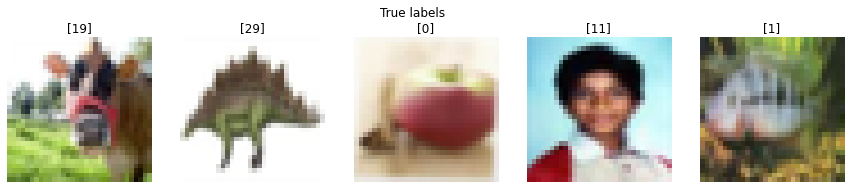

In [295]:
plt.subplots(1,5,figsize=(15,3))
plt.suptitle("True labels")

for i,j in enumerate(X_train_[:5]):
    plt.subplot(151+i) 
    plt.imshow(j)
    plt.axis("off")
    plt.title(str(y_train_[:5][i]))

In [300]:
predicted_label

array([9, 1, 1, 9, 9])

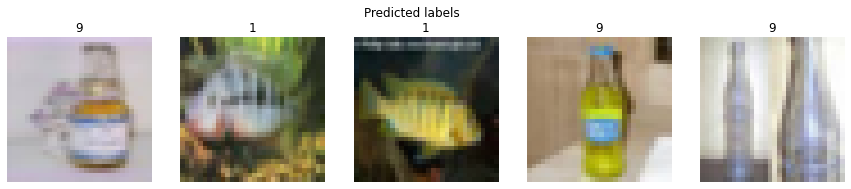

In [359]:
class_9_index = list(np.where(y_train_==9)[0])
class_1_index = list(np.where(y_train_==1)[0])

plt.subplots(1,5,figsize=(15,3))
plt.suptitle("Predicted labels")

for i,j in zip(X_train_[class_9_index[:3]],[0,3,4]):
    plt.subplot(151+j)
    plt.imshow(i)
    plt.title("9")
    plt.axis("off")

for i,j in zip(X_train_[class_1_index[:2]],[1,2]):
    plt.subplot(151+j)
    plt.imshow(i)
    plt.title("1")
    plt.axis("off")



As observed, the accuracy on the test_set (with and without Alpha dropout) is similar

In [169]:
tf.random.set_seed(42)
np.random.seed(42)

model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(256,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(256,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(256,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(256,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(256,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(256,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(256,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(256,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(256,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(256,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(10,activation="softmax",kernel_initializer="glorot_normal")
])

model_2.compile(loss=keras.losses.sparse_categorical_crossentropy,
                           metrics="accuracy")

In [171]:
model_2_history = model_2.fit(X_train_new,y_train,validation_split=0.2,epochs=20)

Epoch 1/20
1250/1250 [==============================] - 8s 7ms/step - loss: 4.7734 - accuracy: 0.3900 - val_loss: 1.7153 - val_accuracy: 0.3882
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0113 - accuracy: 0.4161 - val_loss: 1.6477 - val_accuracy: 0.4002
Epoch 3/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6286 - accuracy: 0.4467 - val_loss: 1.6118 - val_accuracy: 0.4302
Epoch 4/20
1250/1250 [==============================] - 8s 7ms/step - loss: 2.3056 - accuracy: 0.4642 - val_loss: 1.6259 - val_accuracy: 0.4451
Epoch 5/20
1250/1250 [==============================] - 8s 7ms/step - loss: 2.5279 - accuracy: 0.4897 - val_loss: 1.5391 - val_accuracy: 0.4815
Epoch 6/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6439 - accuracy: 0.4918 - val_loss: 1.5219 - val_accuracy: 0.4800
Epoch 7/20
1250/1250 [==============================] - 8s 7ms/step - loss: 2.0169 - accuracy: 0.5145 - val_loss: 1.5686 - val_accuracy: